In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from datetime import date

Please refer to Readme for answers to the assignment questions.

In [2]:
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

In [3]:
tables = pd.read_html(url)
tables

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [4]:
df = tables[0]

In [5]:
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
df = df.iloc[1:]
df.set_index('id', inplace=True)

In [7]:
df = df.sort_values('id')

In [8]:
df = df.astype({'sol': 'int'})

In [9]:
df.dtypes

terrestrial_date     object
sol                   int32
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [10]:
df["terrestrial_date"]= pd.to_datetime(df["terrestrial_date"])

In [11]:
df.dtypes

terrestrial_date    datetime64[ns]
sol                          int32
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [12]:
df

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
3,2012-11-16,100,207,7,-66.0,829.0
4,2012-11-17,101,208,7,-65.0,830.0
5,2012-11-18,102,209,7,-67.0,833.0
6,2012-11-19,103,209,7,-66.0,836.0
7,2012-11-20,104,210,8,-67.0,838.0
...,...,...,...,...,...,...
1891,2018-02-22,1972,133,5,-78.0,730.0
1892,2018-02-24,1974,134,5,-77.0,729.0
1893,2018-02-26,1976,135,5,-77.0,728.0


In [13]:
df.to_csv("mars.csv")

PermissionError: [Errno 13] Permission denied: 'mars.csv'

In [14]:
df['month'].nunique()

12

In [15]:
df['sol'].nunique()

1866

In [16]:
month_df = df.groupby(['month']).mean()

In [17]:
month_df.sort_values(['min_temp'])

,sol,ls,min_temp,pressure
month,,,,
3,1204.406250,75.010417,-83.307292,877.322917
4,1244.500000,104.365979,-82.747423,806.329897
2,1175.853933,44.258427,-79.932584,889.455056
5,1182.691275,132.885906,-79.308725,748.557047
1,1077.574713,15.281609,-77.160920,862.488506
6,755.904110,164.965753,-75.301370,745.095890
12,990.951807,344.692771,-74.451807,842.156627
7,715.105634,194.894366,-72.281690,795.105634
11,947.224638,314.536232,-71.985507,857.014493


In [18]:
month_temp_df = month_df[["min_temp"]]

In [19]:
month_temp_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.301370
7,-72.281690
8,-68.382979
9,-69.171642


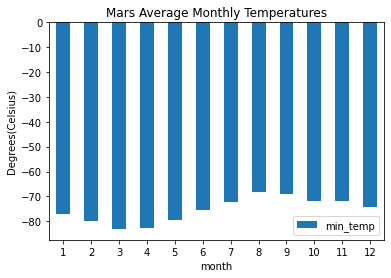

In [20]:
month_temp_df.plot(kind= 'bar')
plt.title("Mars Average Monthly Temperatures")
plt.ylabel("Degrees(Celsius)")
plt.xticks(rotation = 360)
plt.savefig("Figures/monthly_temp.png")

In [21]:
month_df.sort_values(['pressure'])

,sol,ls,min_temp,pressure
month,,,,
6,755.904110,164.965753,-75.301370,745.095890
5,1182.691275,132.885906,-79.308725,748.557047
7,715.105634,194.894366,-72.281690,795.105634
4,1244.500000,104.365979,-82.747423,806.329897
12,990.951807,344.692771,-74.451807,842.156627
11,947.224638,314.536232,-71.985507,857.014493
1,1077.574713,15.281609,-77.160920,862.488506
8,795.333333,224.347518,-68.382979,873.829787
3,1204.406250,75.010417,-83.307292,877.322917


In [22]:
month_pressure_df = month_df[["pressure"]]

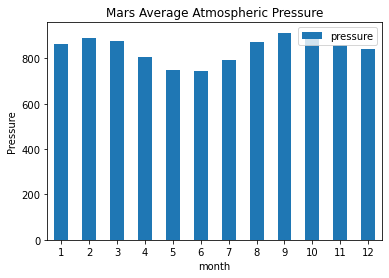

In [23]:
month_pressure_df.plot(kind= 'bar')
plt.title("Mars Average Atmospheric Pressure")
plt.ylabel("Pressure")
plt.xticks(rotation = 360)
plt.legend(loc="best")
plt.savefig("Figures/monthly_pressure.png")

In [24]:
df

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
3,2012-11-16,100,207,7,-66.0,829.0
4,2012-11-17,101,208,7,-65.0,830.0
5,2012-11-18,102,209,7,-67.0,833.0
6,2012-11-19,103,209,7,-66.0,836.0
7,2012-11-20,104,210,8,-67.0,838.0
...,...,...,...,...,...,...
1891,2018-02-22,1972,133,5,-78.0,730.0
1892,2018-02-24,1974,134,5,-77.0,729.0
1893,2018-02-26,1976,135,5,-77.0,728.0


In [25]:
date_df = df.sort_values(['terrestrial_date'])

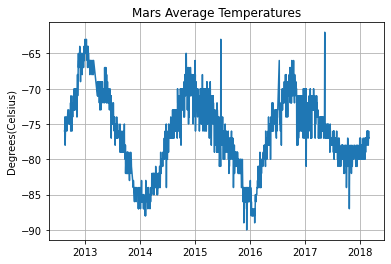

In [26]:
plt.plot(date_df['terrestrial_date'],date_df['min_temp'])
plt.title("Mars Average Temperatures")
plt.ylabel("Degrees(Celsius)")
plt.grid()
plt.xticks(rotation = 360)
plt.savefig("Figures/yearly_temp.png")

In [27]:
start_date_df = date_df.loc[date_df['ls']==0]

In [28]:
start_date_df

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
320,2013-08-01,351,0,1,-75.0,853.0
319,2013-08-02,352,0,1,-77.0,854.0
954,2015-06-19,1019,0,1,-81.0,849.0
938,2015-06-20,1020,0,1,-63.0,832.0
1606,2017-05-06,1688,0,1,-76.0,840.0
1610,2017-05-07,1689,0,1,-75.0,840.0


In [29]:
date_format = "%Y/%M/%D"
a = date(2015,6,19)
b = date(2017,5,6)
delta = b - a
print(delta.days)

687
